In [3]:
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torch
import torchvision
import torchvision.transforms as transforms


import matplotlib.pylab as plt
import seaborn as sns
from PIL import Image
%matplotlib inline



DataSet from Kaggle dataset, 10 monkey species.
https://www.kaggle.com/slothkong/10-monkey-species

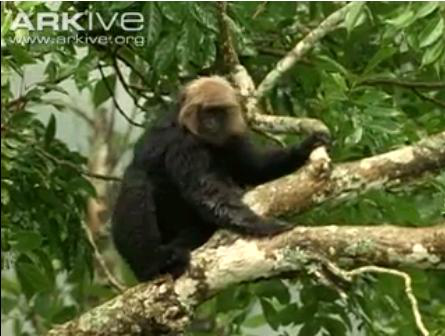

In [5]:
img = Image.open('./training/n9/n9163.jpg')
img

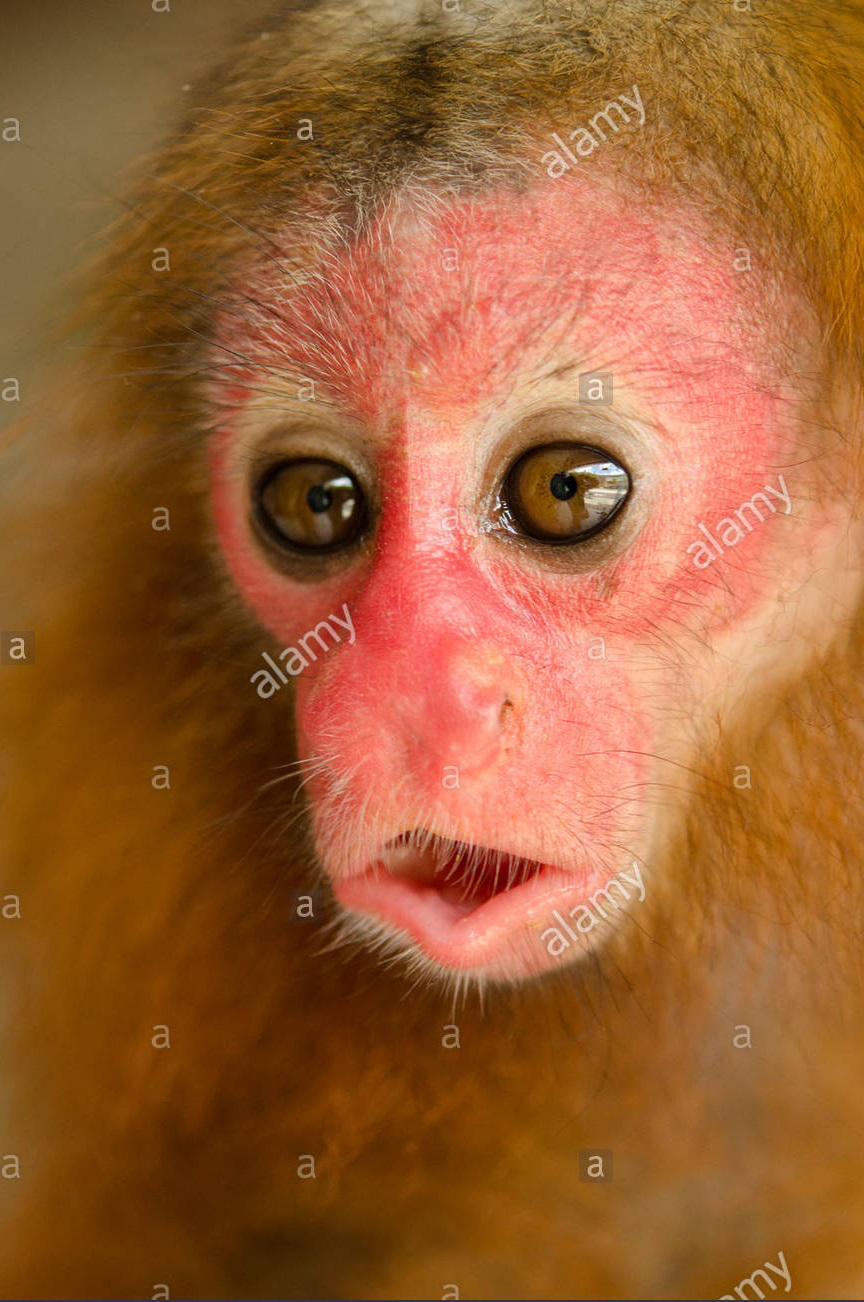

In [7]:
img = Image.open('./training/n2/n2017.jpg')
img

In [30]:
#  CNN example

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 53 * 53, 225)
        self.fc2 = nn.Linear(225, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 53 * 53)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

# init
net = Net()

In [31]:
# init
# loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [32]:
# data normalization , resizer  and crop
# borders have very little or no information
# heterogenic sizes on the dataset
normalize = transforms.Normalize(
   mean=[0.485, 0.456, 0.406],
   std=[0.229, 0.224, 0.225]
)
preprocess = transforms.Compose([
   transforms.Resize(256),
    transforms.CenterCrop(224),
   transforms.ToTensor(),
   normalize
])

In [33]:
# load training data
trainset = torchvision.datasets.ImageFolder(root='training/', transform=preprocess)

In [34]:
# load Validation data
valset = torchvision.datasets.ImageFolder(root='validation/', transform=preprocess)

In [35]:
trainset.classes

['n0', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9']

In [36]:
# create a loader
trainloader = torch.utils.data.DataLoader(trainset, batch_size=12,
                                           shuffle=True, num_workers=2)

In [37]:
valloader = torch.utils.data.DataLoader(valset, batch_size=1,
                                           shuffle=True, num_workers=2)

In [38]:
# quick & dirty eval func
def eval(model):
    correct = 0
    total = 0
    for data in valloader:
        images, labels = data
        outputs = model(Variable(images))
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum()
    acc = 100 * correct / total
    print('Accuracy of the network on the {} test images: {:.3f}'.format(total, acc ))
    return acc

In [39]:
def training(model, epochs=20, optimizer= optimizer):
    historic_loss = list()
    historic_acc = list()
    for epoch in range(epochs):  # loop over the dataset multiple times

        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            # get the inputs
            inputs, labels = data

            # wrap them in Variable
            inputs, labels = Variable(inputs), Variable(labels)

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # print statistics
            running_loss += loss.data[0]
            if i % 20 == 19:    # print every 2000 mini-batches
                print('[%d, %5d] loss: %.6f' %
                      (epoch + 1, i + 1, running_loss / 20))
                running_loss = 0.0

        historic_loss.append(loss.data[0])
        historic_acc.append(eval(model))
    print('Finished Training')
    return historic_loss, historic_acc

In [40]:
netl, neta = training(net, optimizer=optimizer)

[1,    20] loss: 2.308226
[1,    40] loss: 2.297672
[1,    60] loss: 2.282898
[1,    80] loss: 2.249513
Accuracy of the network on the 272 test images: 19.853
[2,    20] loss: 2.089754
[2,    40] loss: 2.024970
[2,    60] loss: 2.002588
[2,    80] loss: 1.953252
Accuracy of the network on the 272 test images: 23.162
[3,    20] loss: 1.829099
[3,    40] loss: 1.713527
[3,    60] loss: 1.847542
[3,    80] loss: 1.734335
Accuracy of the network on the 272 test images: 35.294
[4,    20] loss: 1.526339
[4,    40] loss: 1.608363
[4,    60] loss: 1.467028
[4,    80] loss: 1.353220
Accuracy of the network on the 272 test images: 44.853
[5,    20] loss: 1.314855
[5,    40] loss: 1.251866
[5,    60] loss: 1.246212
[5,    80] loss: 1.194470
Accuracy of the network on the 272 test images: 47.059
[6,    20] loss: 0.997495
[6,    40] loss: 0.887460
[6,    60] loss: 1.063961
[6,    80] loss: 0.959226
Accuracy of the network on the 272 test images: 51.103
[7,    20] loss: 0.786871
[7,    40] loss: 0.6

In [41]:
# bigger CCN

class Bignet(nn.Module):
    def __init__(self):
        super(Bignet, self).__init__()
        self.conv1 = nn.Conv2d(3, 12, 8)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(12, 21, 8)
        
        self.fc1 = nn.Linear(21 * 50 * 50, 425)
        self.fc2 = nn.Linear(425, 100)
        self.fc3 = nn.Linear(100, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        #print(x.size())
        x = x.view(-1, 21 * 50 * 50)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# init
bnet = Bignet()
optimizer = optim.SGD(bnet.parameters(), lr=0.001, momentum=0.9)

In [42]:
bnetl, bneta = training(bnet, optimizer=optimizer)

[1,    20] loss: 2.295945
[1,    40] loss: 2.262884
[1,    60] loss: 2.236525
[1,    80] loss: 2.071252
Accuracy of the network on the 272 test images: 28.309
[2,    20] loss: 1.801384
[2,    40] loss: 1.797541
[2,    60] loss: 1.933941
[2,    80] loss: 1.808075
Accuracy of the network on the 272 test images: 34.926
[3,    20] loss: 1.548642
[3,    40] loss: 1.595688
[3,    60] loss: 1.776132
[3,    80] loss: 1.570253
Accuracy of the network on the 272 test images: 38.603
[4,    20] loss: 1.397451
[4,    40] loss: 1.411776
[4,    60] loss: 1.468890
[4,    80] loss: 1.285340
Accuracy of the network on the 272 test images: 41.176
[5,    20] loss: 1.045656
[5,    40] loss: 1.086375
[5,    60] loss: 1.180584
[5,    80] loss: 1.332874
Accuracy of the network on the 272 test images: 44.853
[6,    20] loss: 0.928273
[6,    40] loss: 0.867833
[6,    60] loss: 1.006504
[6,    80] loss: 0.993447
Accuracy of the network on the 272 test images: 48.897
[7,    20] loss: 0.645937
[7,    40] loss: 0.6

In [50]:
# bigger CCN

class Complexnet(nn.Module):
    def __init__(self):
        super(Complexnet, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, 5)
        self.conv3 = nn.Conv2d(32, 48, 5)

        self.fc1 = nn.Linear(48 * 24 * 24, 425)
        self.fc2 = nn.Linear(425, 128)
        self.fc3 = nn.Linear(128, 10)

        
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))

        #print(x.size())
        x = x.view(-1, 48 * 24 * 24)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# init
cnet = Complexnet()
optimizer = optim.SGD(cnet.parameters(), lr=0.001, momentum=0.9)

In [51]:
cnetl, cneta = training(cnet, epochs=35, optimizer=optimizer)

[1,    20] loss: 2.298641
[1,    40] loss: 2.296569
[1,    60] loss: 2.285260
[1,    80] loss: 2.264432
Accuracy of the network on the 272 test images: 27.941
[2,    20] loss: 2.171454
[2,    40] loss: 2.066081
[2,    60] loss: 2.042241
[2,    80] loss: 2.004077
Accuracy of the network on the 272 test images: 30.515
[3,    20] loss: 1.827966
[3,    40] loss: 2.002110
[3,    60] loss: 1.815997
[3,    80] loss: 1.820298
Accuracy of the network on the 272 test images: 32.353
[4,    20] loss: 1.791322
[4,    40] loss: 1.677493
[4,    60] loss: 1.738021
[4,    80] loss: 1.808294
Accuracy of the network on the 272 test images: 36.765
[5,    20] loss: 1.593207
[5,    40] loss: 1.772468
[5,    60] loss: 1.568343
[5,    80] loss: 1.576196
Accuracy of the network on the 272 test images: 37.500
[6,    20] loss: 1.403065
[6,    40] loss: 1.514481
[6,    60] loss: 1.411024
[6,    80] loss: 1.369500
Accuracy of the network on the 272 test images: 39.706
[7,    20] loss: 1.134041
[7,    40] loss: 1.2

In [52]:
!pwd

/home/ccorbi/Work/Beagle/training/monkeys


/home/ccorbi/anaconda3/lib/python3.5/site-packages/matplotlib/legend.py:645: UserWarning: Automatic legend placement (loc="best") not implemented for figure legend. Falling back on "upper right".
  warnings.warn('Automatic legend placement (loc="best") not '


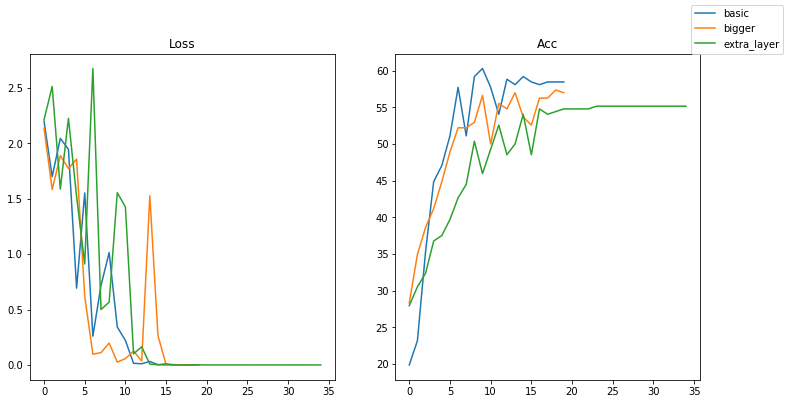

In [68]:
#netl, neta
fig, ax = plt.subplots(1,2, figsize=(12,6))
# simple
ax[0].set_title('Loss')
ax[1].set_title('Acc')
ax[0].plot(netl)
ax[1].plot(neta)
# re nodes
ax[0].plot(bnetl)
ax[1].plot(bneta)
# extra layer
ax[0].plot(cnetl)
ax[1].plot(cneta)
fig.legend(['basic', 'bigger', 'extra_layer'], loc = 'best')

this is a clear example of how challenging id to come with better Network architectures. Bigger do not means better, and add extra convolutions must be done having in mind the nature of the data.
There are many approaches for network optimitzation using simple random search,  or more advanced approaches using genetic and,  bayesian algorithms. 